# **Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import f
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('fetal_health.csv')
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
data.shape

(2126, 22)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [6]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [7]:
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [8]:
features=data.drop(columns=['fetal_health']).columns
features

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],
      dtype='object')

## **Basic EDA**

In [9]:
X=data[features]
y=data['fetal_health']

### **Correlation and Multicollinearity**

**Correlation Plot**

<Axes: >

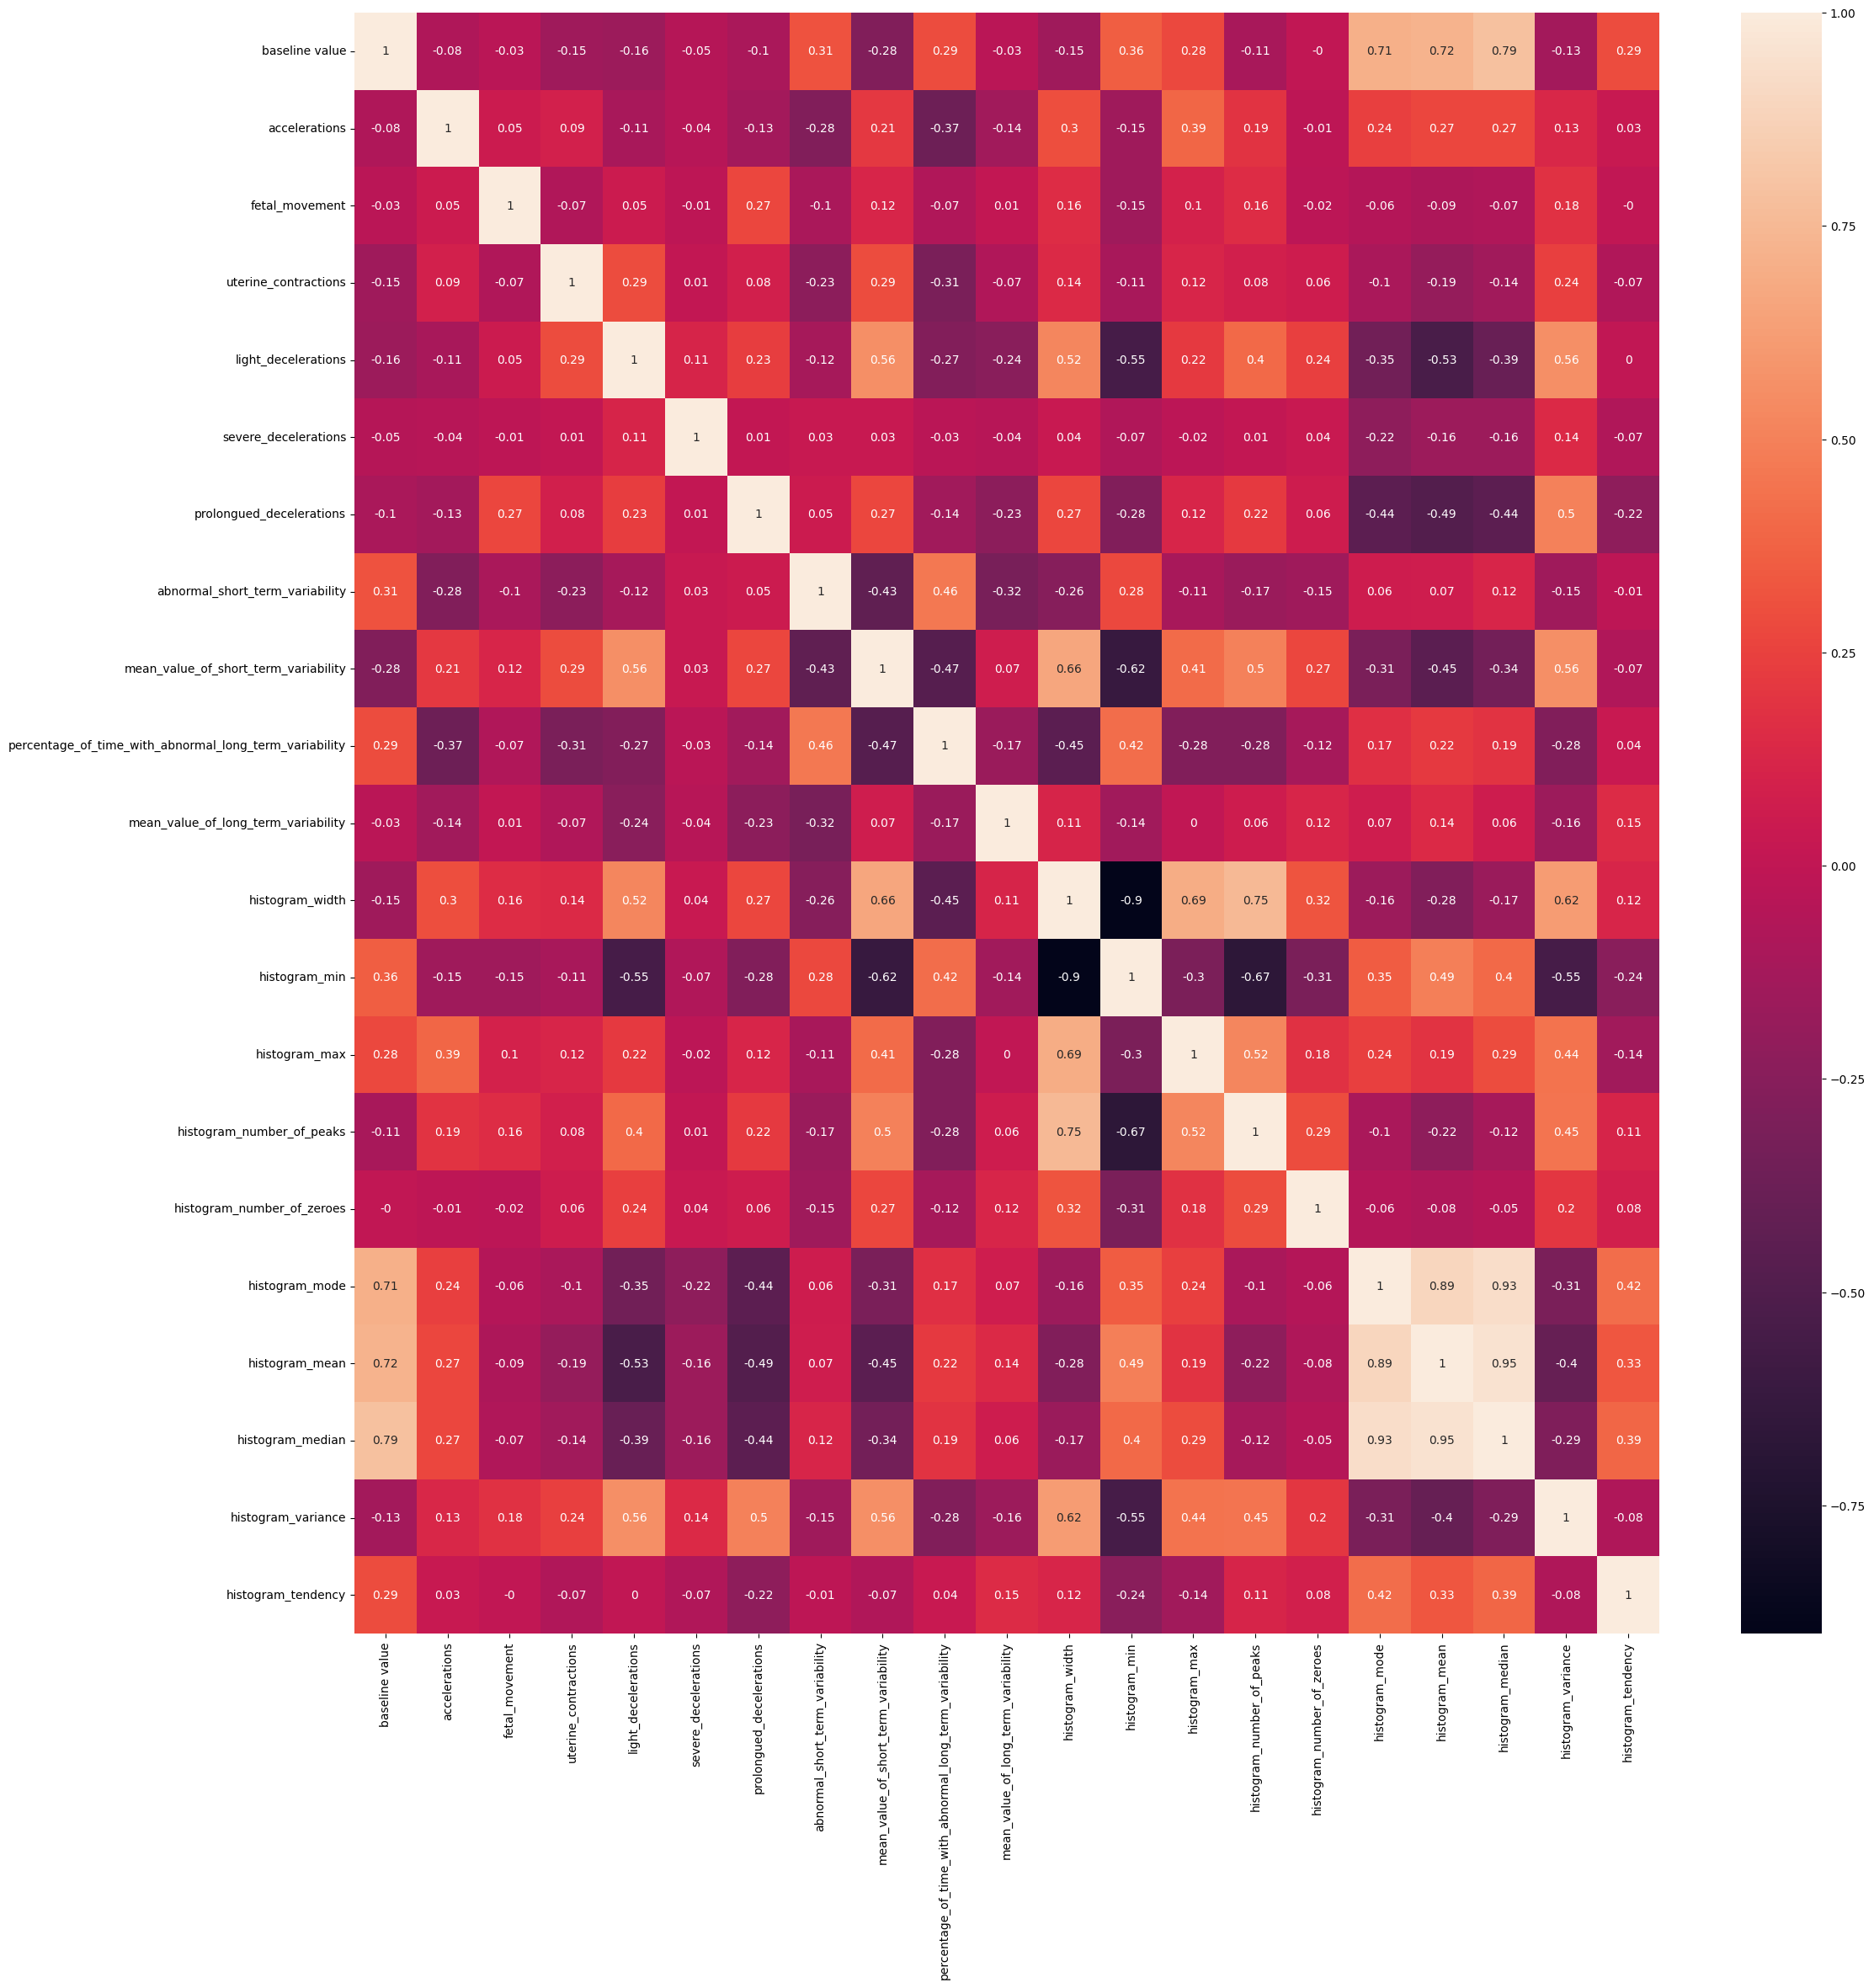

In [10]:
correlation_matrix=X.corr().round(2)
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True)

 **Multicollinearity test using variance inflation factor(VIF)**

In [11]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [sm.OLS(X[col], sm.add_constant(X.drop(columns=[col]))).fit().rsquared for col in X.columns]
    return vif_data


vif_result = calculate_vif(X)
vif_result

,Feature,VIF
0,baseline value,0.850987
1,accelerations,0.653953
2,fetal_movement,0.121410
3,uterine_contractions,0.220558
4,light_decelerations,0.710310
5,severe_decelerations,0.118734
6,prolongued_decelerations,0.634386
7,abnormal_short_term_variability,0.479941
8,mean_value_of_short_term_variability,0.664304
9,percentage_of_time_with_abnormal_long_term_var...,0.467763


Based on the provided VIF values for each feature, it appears that multicollinearity is not a significant issue in the dataset.

**VIF values less than 5 typically indicate low multicollinearity, and values below 10 are generally considered acceptable. In this case, all the VIF values are well below 5, which suggests that there is no severe multicollinearity among the predictor variables.**

## **Univariate Analysis**

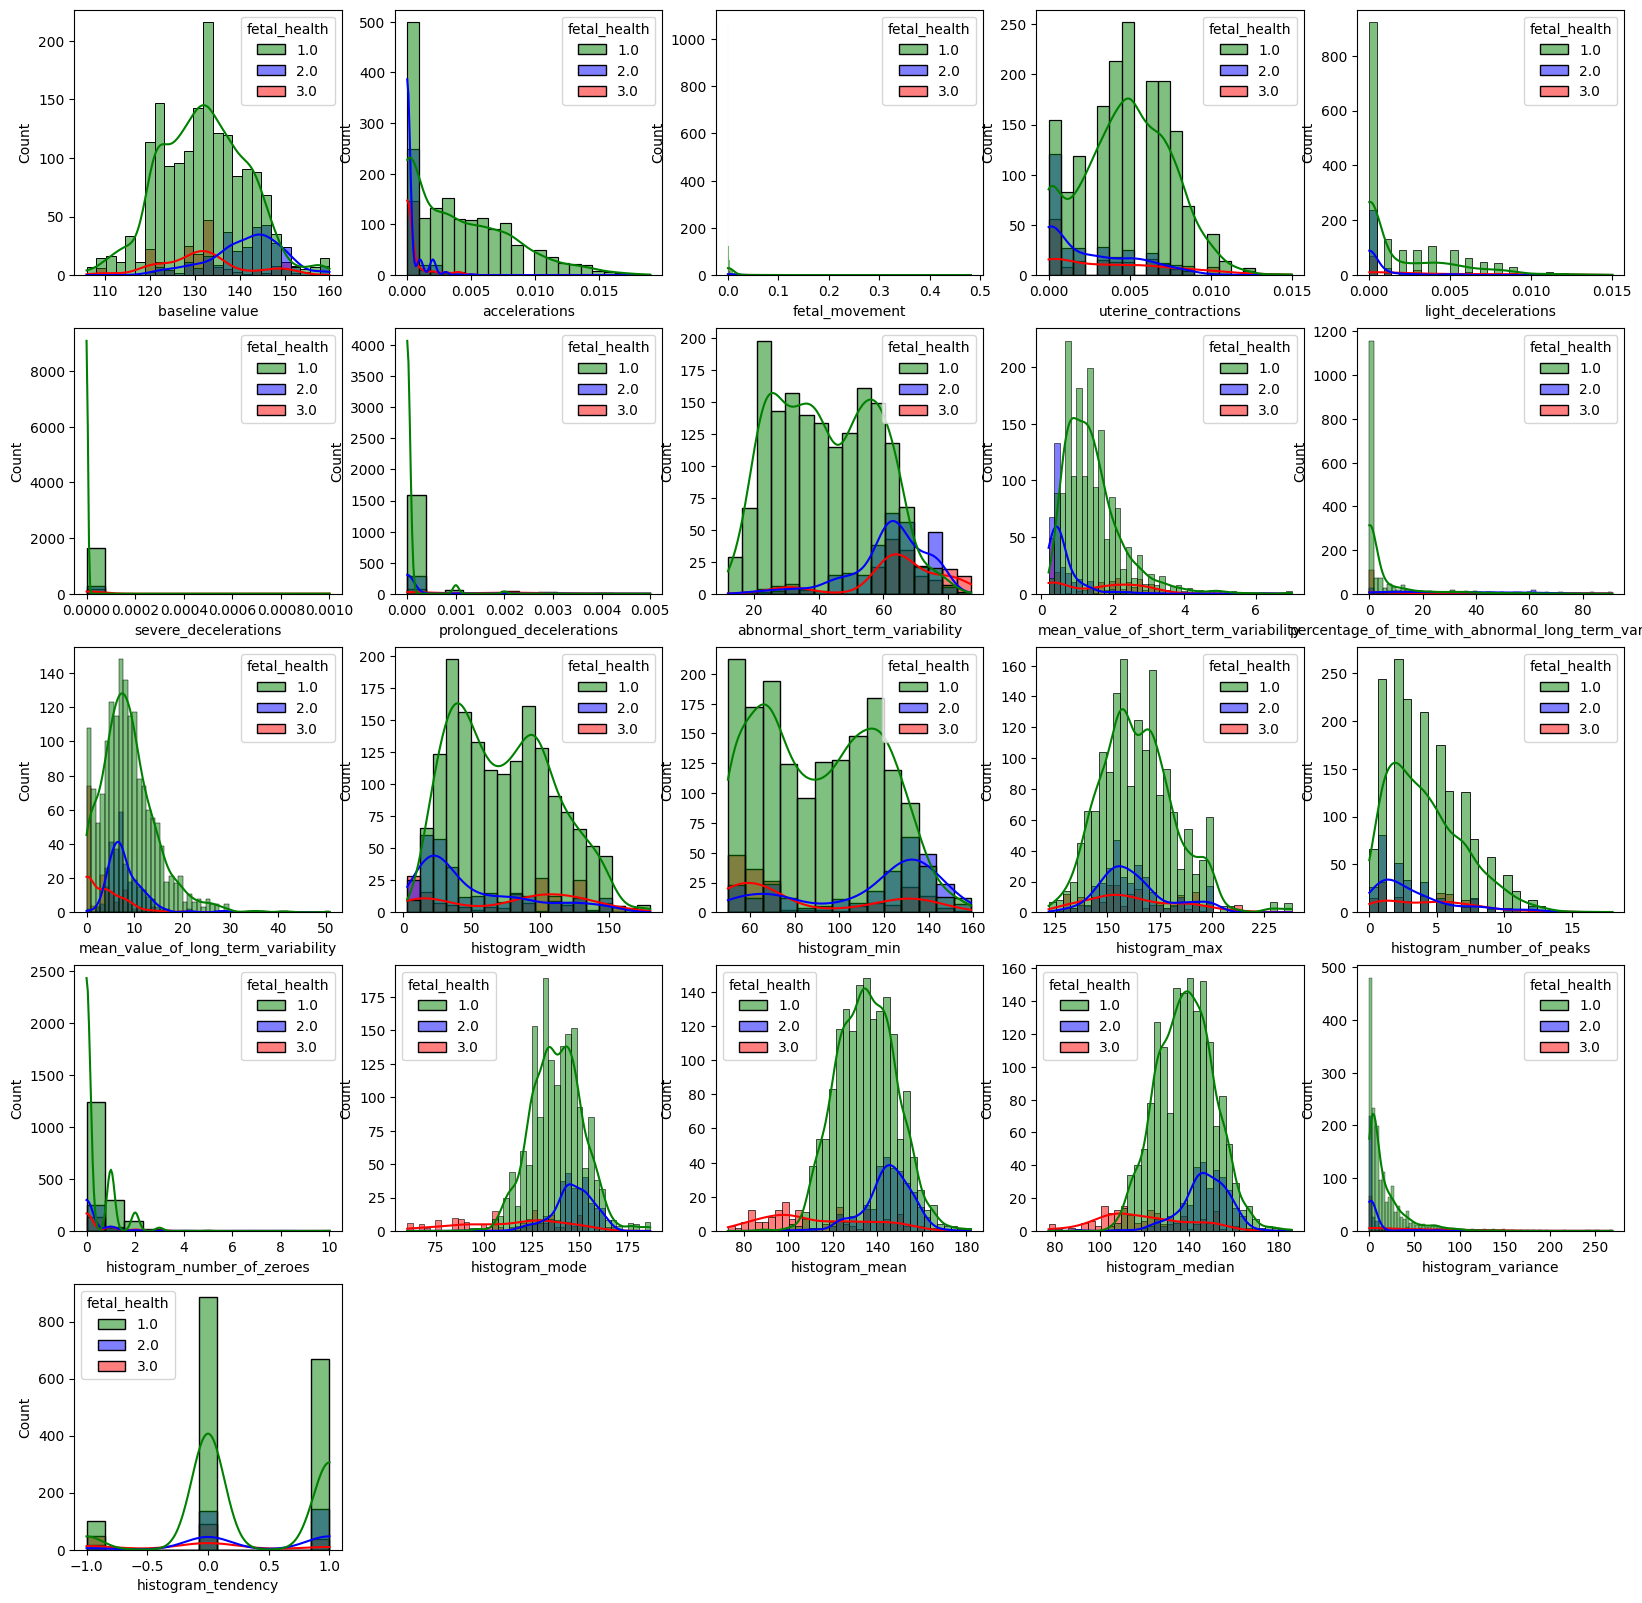

In [12]:
l=len(features)
plt.figure(figsize=(20,20))
for i in range(l):
  plt.subplot(l//4,5,i+1)
  sns.histplot(data=data,x=features[i],kde=True,hue='fetal_health',palette={1:'green',2:'blue',3:'red'})

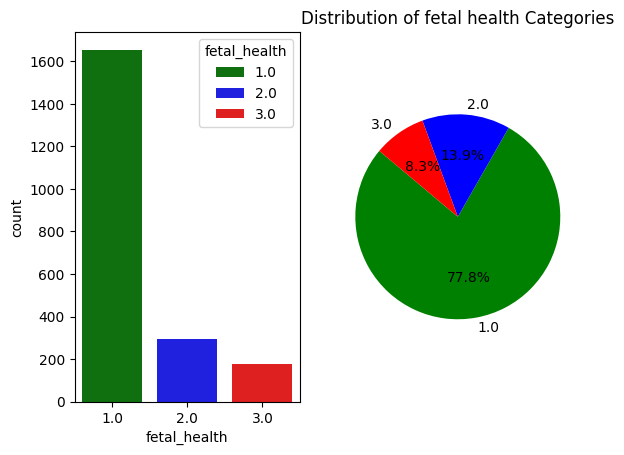

In [13]:
plt.subplot(1,2,1)
sns.countplot(data=data,x='fetal_health',hue='fetal_health',palette={1:'green',2:'blue',3:'red'})

target_counts = data['fetal_health'].value_counts()

# Create pie chart
plt.subplot(1,2,2)
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140,colors=[ 'green', 'blue', 'red'] )
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of fetal health Categories')
plt.show()

## **Bivariate Analysis**

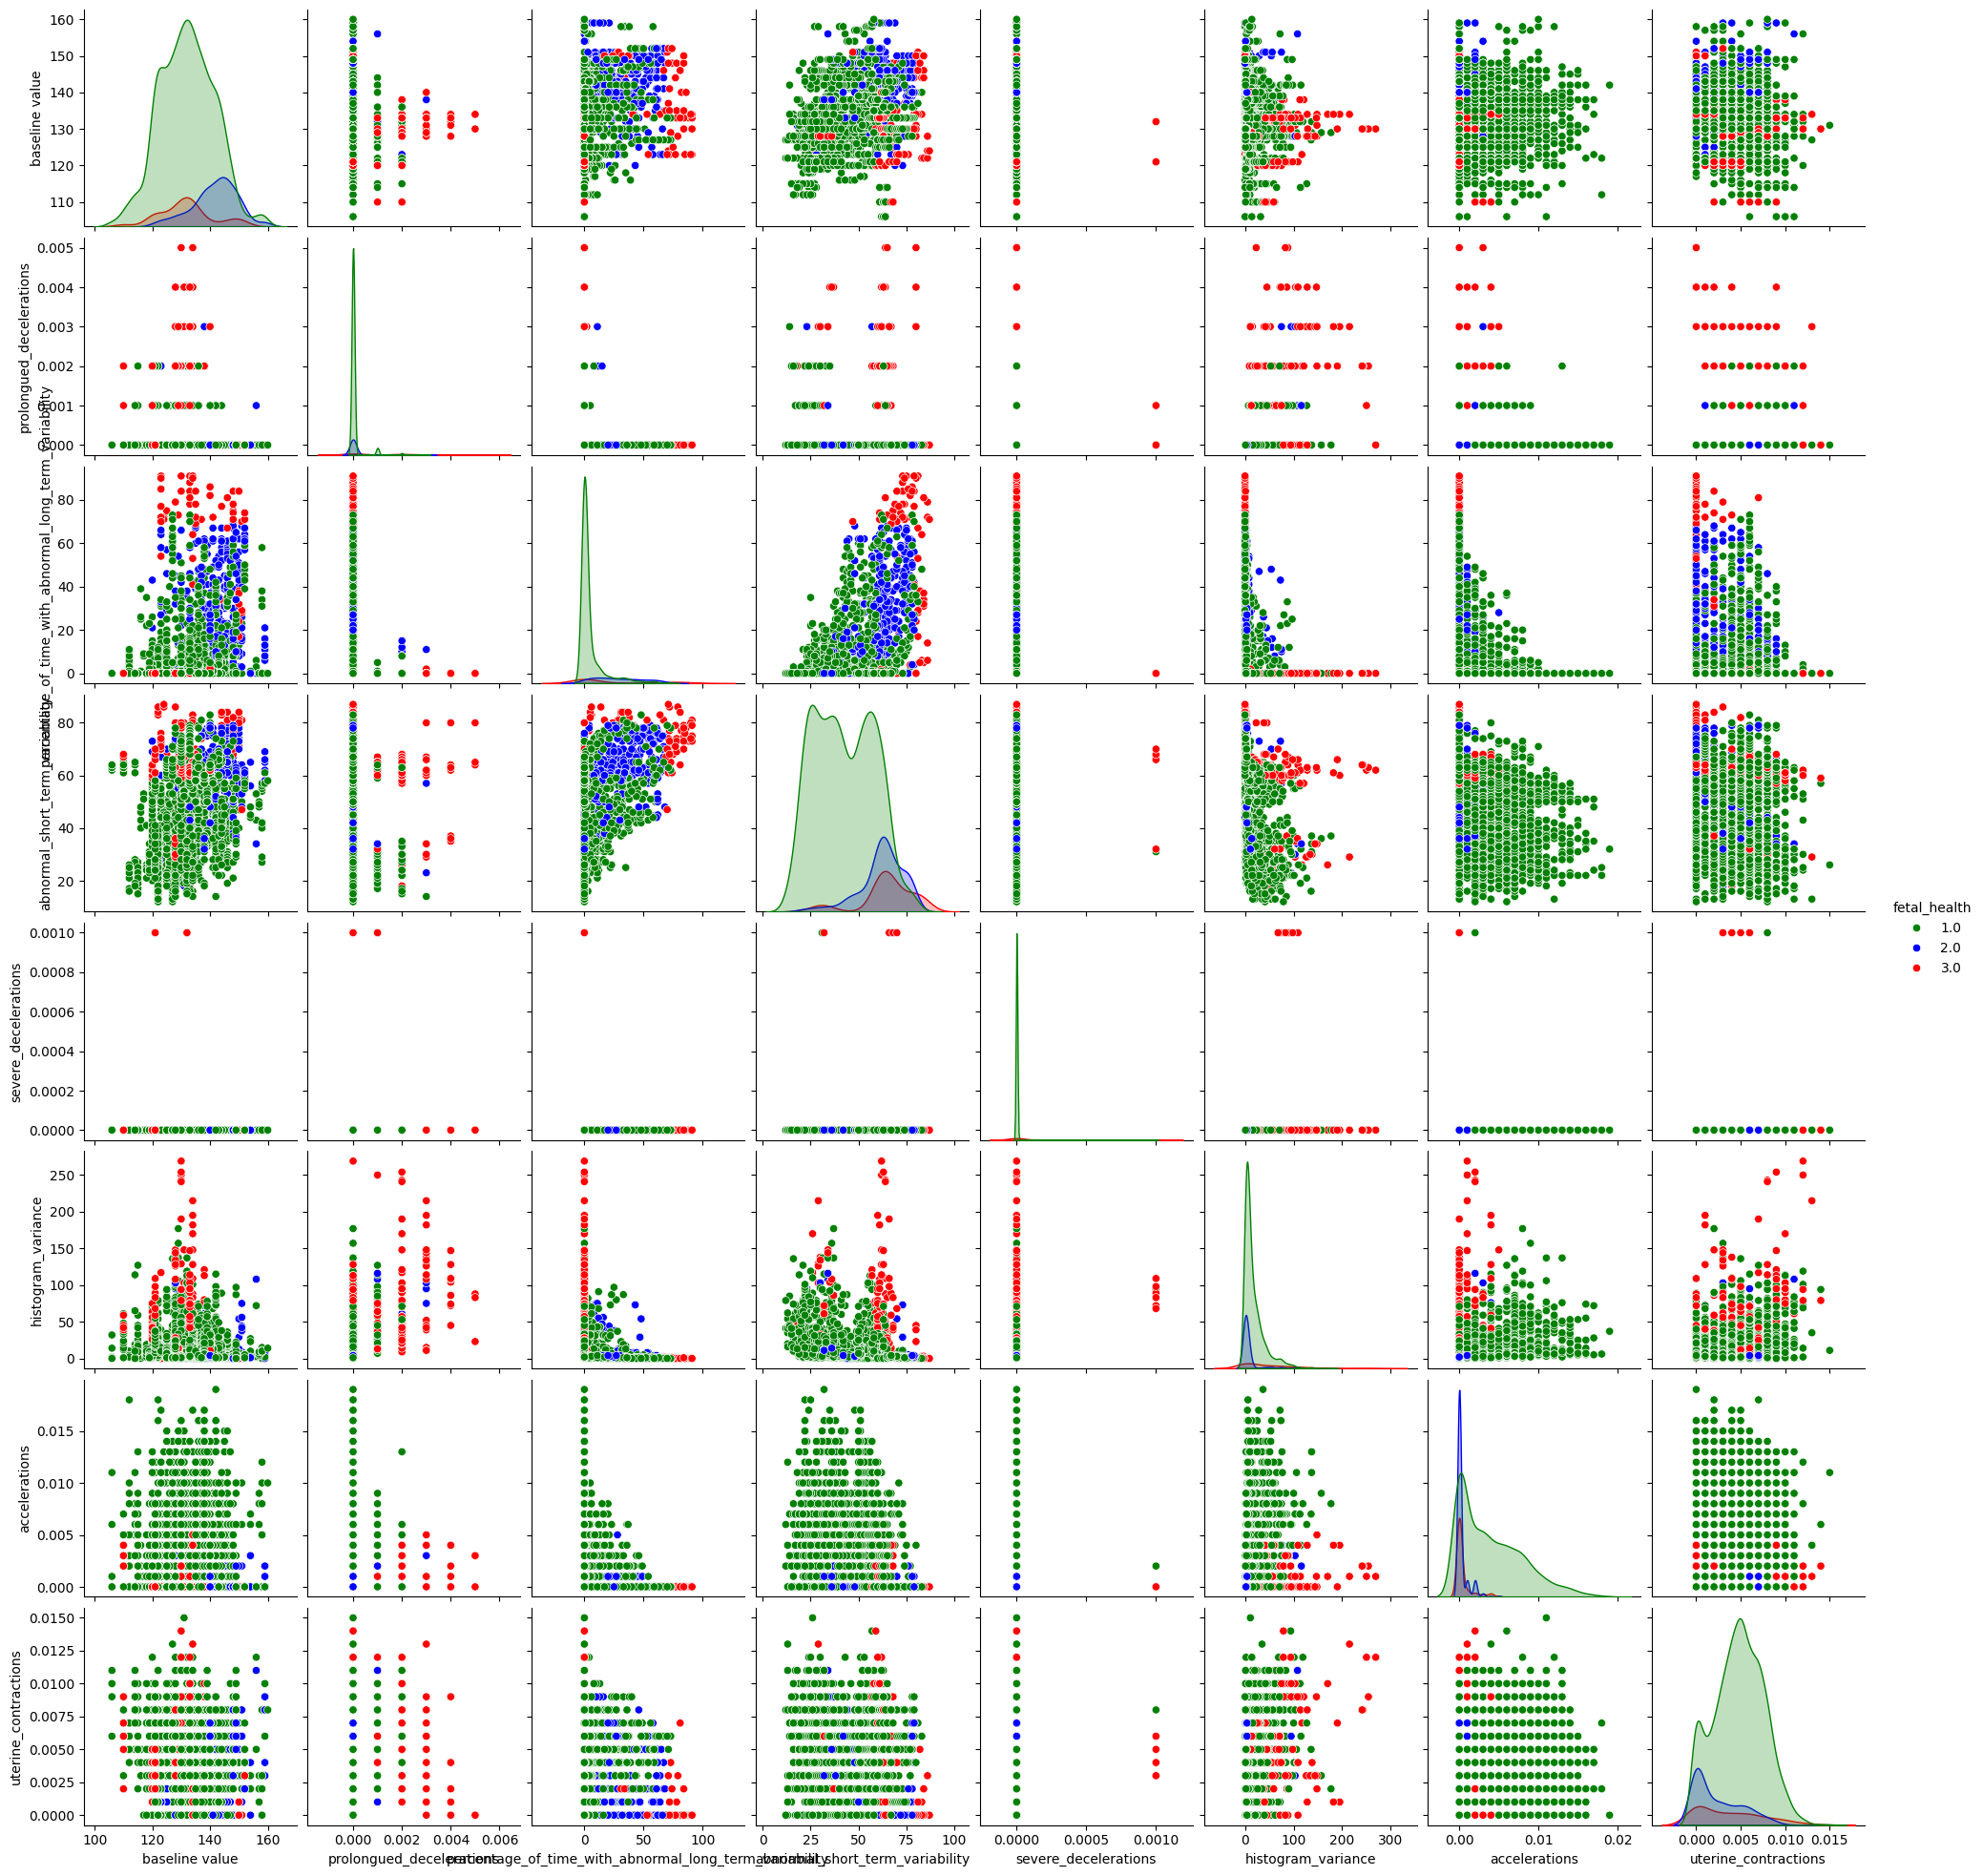

In [14]:
sns.pairplot(data=data[['baseline value','prolongued_decelerations','percentage_of_time_with_abnormal_long_term_variability','abnormal_short_term_variability','severe_decelerations','histogram_variance','accelerations','uterine_contractions','fetal_health']],hue='fetal_health',palette={1:'green',2:'blue',3:'red'})

## **Feature Scaling**

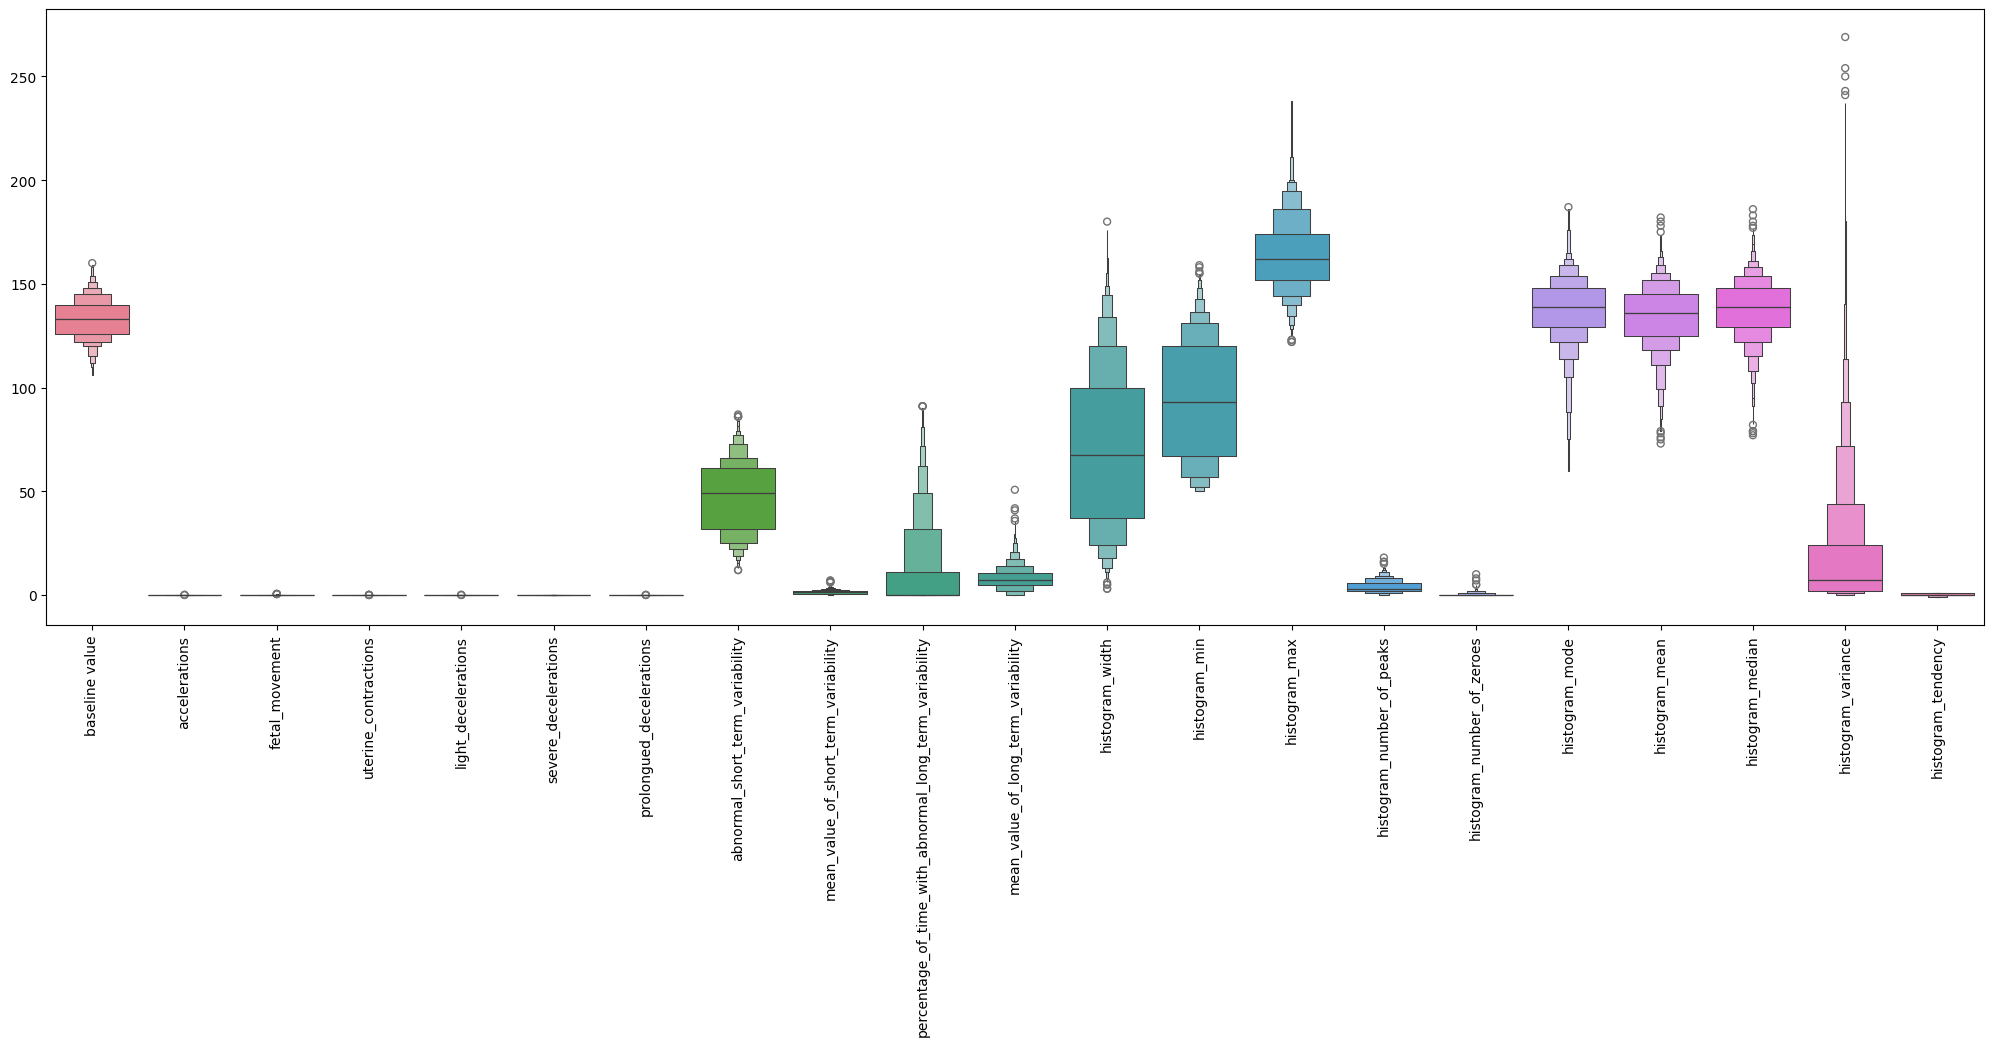

In [15]:
plt.figure(figsize=(25,8))
sns.boxenplot(data=X)
plt.xticks(rotation=90)
plt.show()

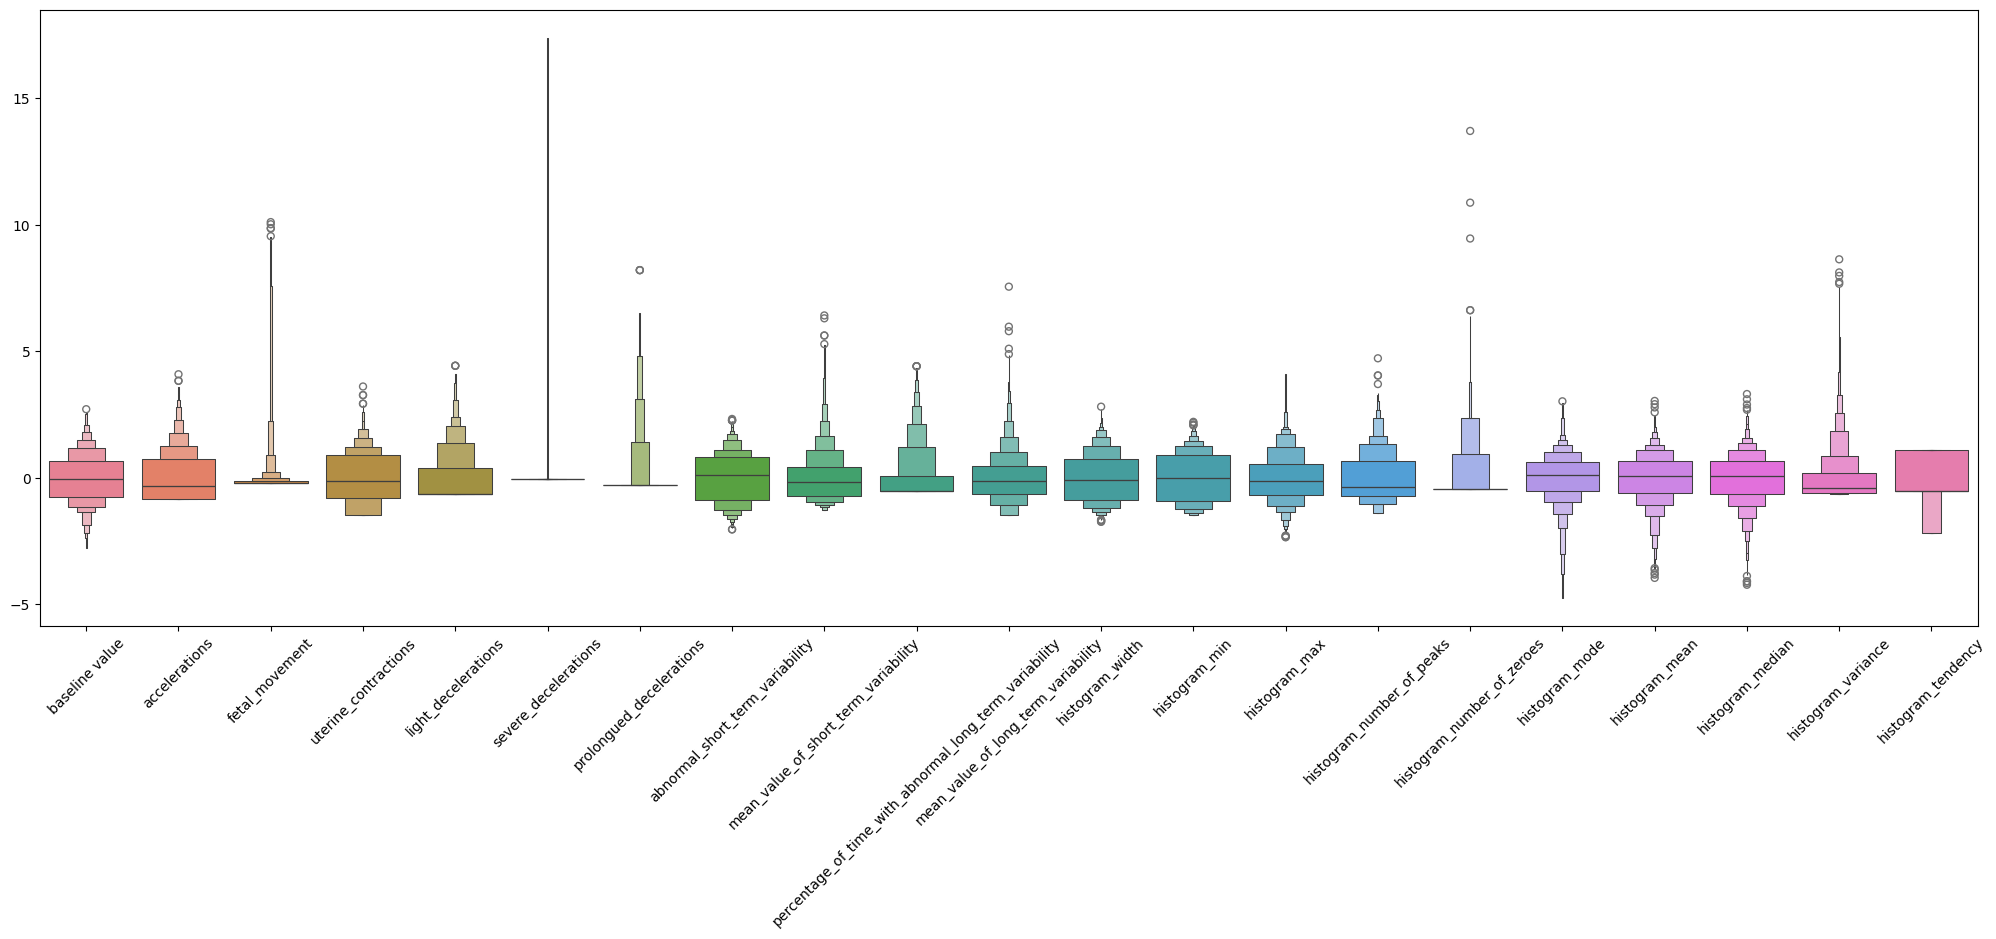

In [16]:
sc=StandardScaler().fit_transform(X)
X_scaled=pd.DataFrame(sc,columns=list(X.columns))

plt.figure(figsize=(25,8))
sns.boxenplot(data=X_scaled)
plt.xticks(rotation=45)
plt.show()

## **Logistic Regression**

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(x_train.shape,y_test.shape)

(1700, 21) (426,)


In [18]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [19]:
model=LogisticRegression()
model.fit(x_train_scaled,y_train)
y_pred_log=model.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred_log))

0.9154929577464789


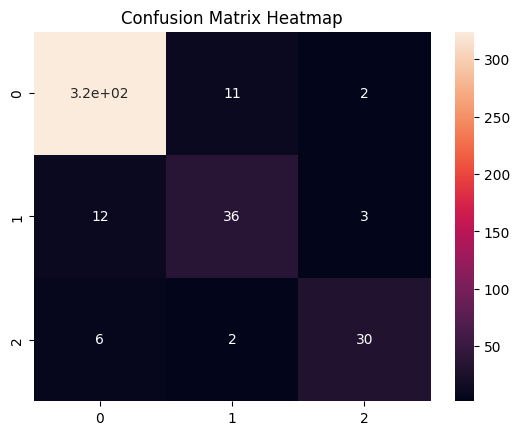

In [20]:
cm=confusion_matrix(y_test,y_pred_log)
sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix Heatmap")
plt.show()

In [21]:
model.score(x_test_scaled,y_test)

0.9154929577464789

## **Forward selection**

In [22]:
X=data[features]
y=data['fetal_health']


x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

X_train=pd.DataFrame(x_train,columns=list(X.columns))

In [23]:
def forward_selection(X, y, criterion='aic'):
    # Initialize an empty list to store selected features
    selected_features = []
    r_squared_scores = []
    aic_values = []
    bic_values = []
    used_features=[]

    # Start with an empty model
    remaining_features = list(X.columns)

    while remaining_features:
        best_criterion = np.inf if criterion == 'aic' or criterion == 'bic' else -np.inf
        best_feature = None

        # Evaluate each remaining feature
        for feature in remaining_features:
            model_features = selected_features + [feature]
            X_subset = X[model_features]
            X_subset = sm.add_constant(X_subset)  # Add constant for intercept
            model = sm.OLS(y, X_subset).fit()

            # Evaluate the criterion for the model
            if criterion == 'aic':
                model_criterion = model.aic
            elif criterion == 'bic':
                model_criterion = model.bic
            elif criterion == 'r_squared':
                model_criterion = model.rsquared_adj

            # Update the best feature and criterion
            if (criterion == 'aic' or criterion == 'bic') and model_criterion < best_criterion:
                best_criterion = model_criterion
                best_feature = feature
            elif criterion == 'r_squared' and model_criterion > best_criterion:
                best_criterion = model_criterion
                best_feature = feature

        # Add the best feature to the selected features list

        selected_features.append(best_feature)
        remaining_features.remove(best_feature)

        final_model_features = selected_features[:]
        X_final = X[final_model_features]
        X_final = sm.add_constant(X_final)
        final_model = sm.OLS(y, X_final).fit()
        used_features.append(final_model_features)

        # Store R-squared, AIC, and BIC values for the final model
        r_squared_scores.append(final_model.rsquared_adj)
        aic_values.append(final_model.aic)
        bic_values.append(final_model.bic)

    result = pd.DataFrame({'features': used_features,'r_squared_score': r_squared_scores,'aic_value': aic_values,'bic_value': bic_values})

    return result

In [24]:
result = forward_selection(X_train, y_train, criterion='aic')
result

,features,r_squared_score,aic_value,bic_value
0,[prolongued_decelerations],0.243463,2706.555695,2717.432462
1,"[prolongued_decelerations, percentage_of_time_...",0.494446,2022.289077,2038.604228
2,"[prolongued_decelerations, percentage_of_time_...",0.550731,1822.629660,1844.383194
3,"[prolongued_decelerations, percentage_of_time_...",0.566511,1762.842686,1790.034604
4,"[prolongued_decelerations, percentage_of_time_...",0.573188,1737.453591,1770.083893
5,"[prolongued_decelerations, percentage_of_time_...",0.579003,1715.129479,1753.198164
6,"[prolongued_decelerations, percentage_of_time_...",0.586523,1685.482600,1728.989668
7,"[prolongued_decelerations, percentage_of_time_...",0.588060,1680.148477,1729.093929
8,"[prolongued_decelerations, percentage_of_time_...",0.590526,1670.933190,1725.317025
9,"[prolongued_decelerations, percentage_of_time_...",0.598479,1638.586376,1698.408595


## **Linear Regression with target  variable as baseline value**

In [25]:
x=X.drop(columns=['baseline value'])
Y=data['baseline value']


x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2)
print(x_train.shape,y_test.shape)


sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

(1700, 20) (426,)


In [26]:
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)
y_pred_train_lin=lr.predict(x_train_scaled)
y_pred_test_lin=lr.predict(x_test_scaled)

In [27]:
lr.coef_

array([-2.67233691, -0.06448177, -0.14055928,  2.4512611 ,  0.85607264,
        3.38748464,  1.21054019,  0.96499925,  0.27985377,  0.02223356,
       -0.0111879 ,  0.49284818,  0.78756115, -0.66132305,  0.12832319,
       -1.29215516,  4.69076796,  7.31919   , -0.57043547,  0.22061279])

In [28]:
print("mean squared error = {} \nr-squared score = {}".format(mean_squared_error(y_test,y_pred_test_lin),r2_score(y_test,y_pred_test_lin)))

mean squared error = 16.780217605002424 
r-squared score = 0.8204547433941608


### **AIC & BIC score**

In [29]:
n_parameters=len(lr.coef_)  # Number of coefficients + intercept

mse=mean_squared_error(y_train,lr.predict(x_train_scaled))
# Calculate the log-likelihood
log_likelihood = -0.5 * mse * len(y_train)


# Calculate AIC and BIC
AIC = 2 * n_parameters - 2 * log_likelihood
BIC = np.log(len(y)) * n_parameters - 2 * log_likelihood
print("AIC:", AIC)
print("BIC:", BIC)

AIC: 23751.978670237368
BIC: 23865.218621415406


## **Residual Analysis for linear regression**

### 1. Residual distribution

mean of residuals is  1.9786525359343025e-14 
standard deviation of residuals is  3.7347319511845094


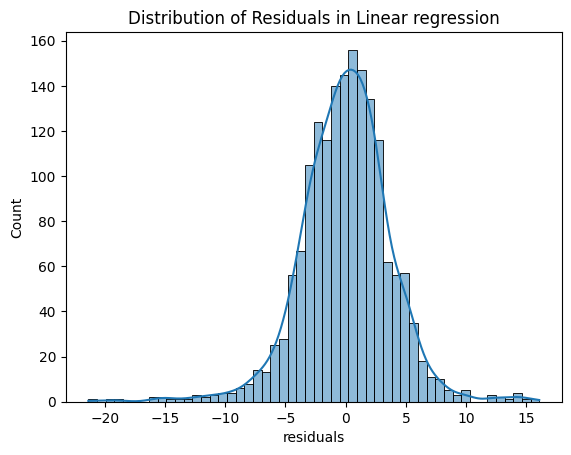

In [30]:
residuals_lin=y_train-y_pred_train_lin
print('mean of residuals is ',np.mean(residuals_lin),'\nstandard deviation of residuals is ',np.std(residuals_lin))
sns.histplot(data=residuals_lin,kde=True)
plt.xlabel('residuals')
plt.title('Distribution of Residuals in Linear regression')
plt.show()


### 2. Features vs Residuals

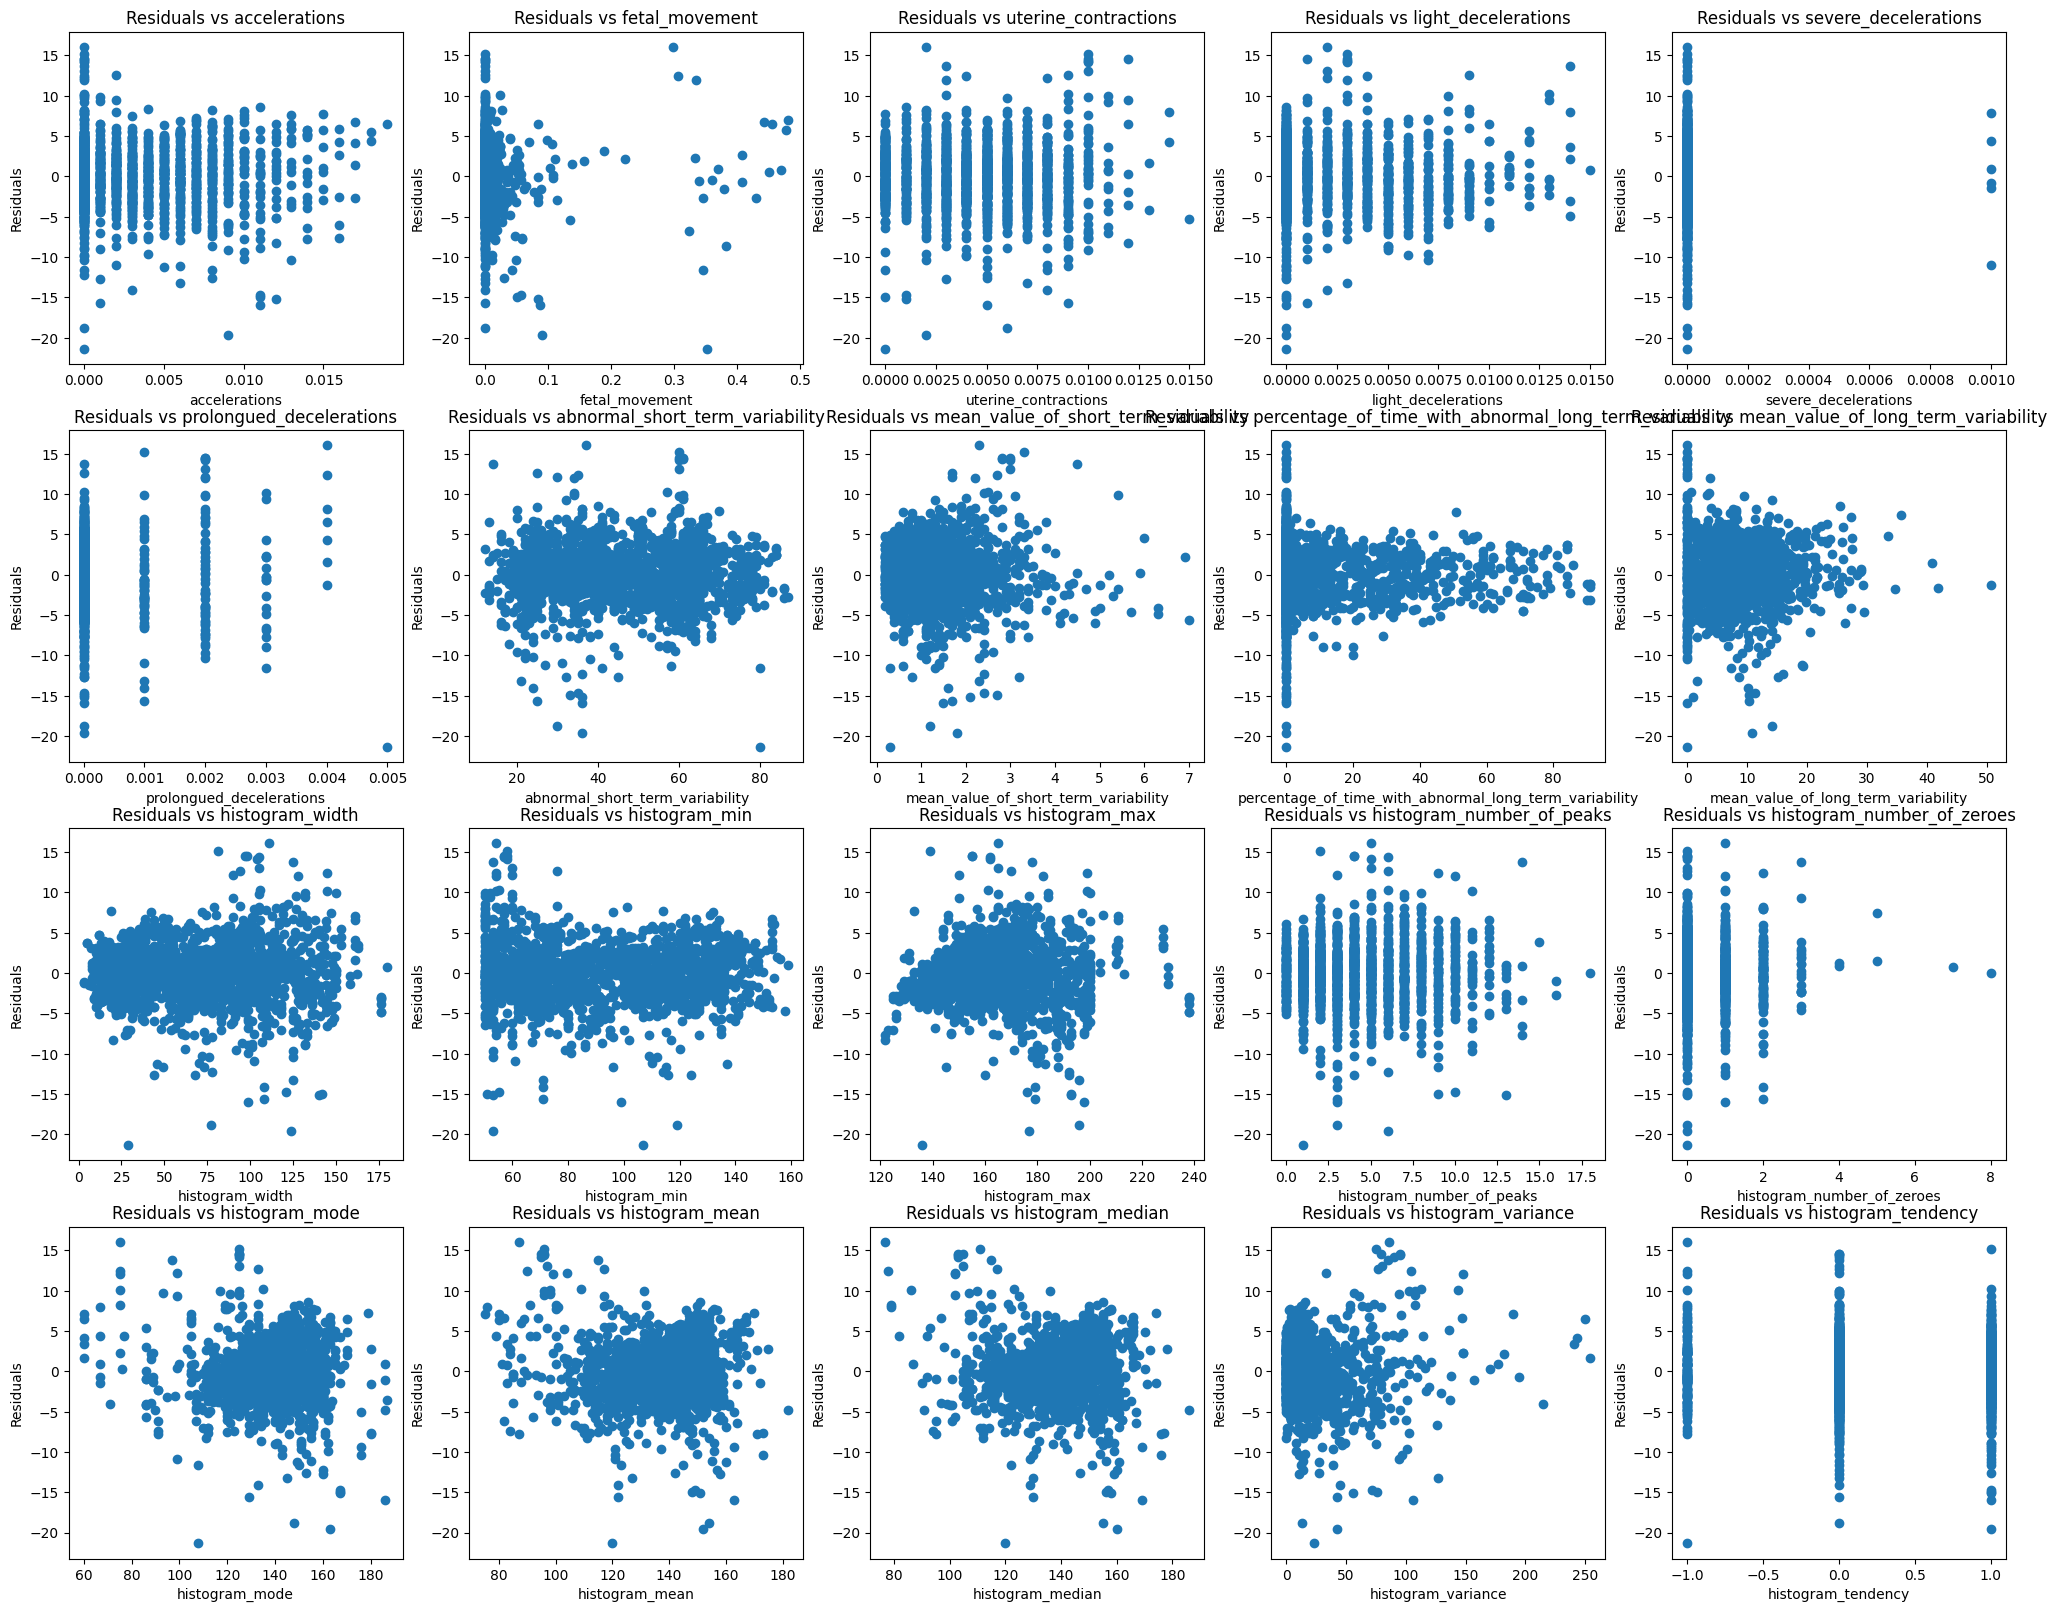

In [31]:
cols=x_test.columns
l1=len(cols)
plt.figure(figsize=(25,25))
for i in range(l1):
  plt.subplot(l1//4,5,i+1)
  plt.scatter(x=x_train[cols[i]],y=residuals_lin)
  plt.xlabel(cols[i])
  plt.ylabel('Residuals')
  plt.title('Residuals vs '+cols[i])

### 3. Output vs Residuals

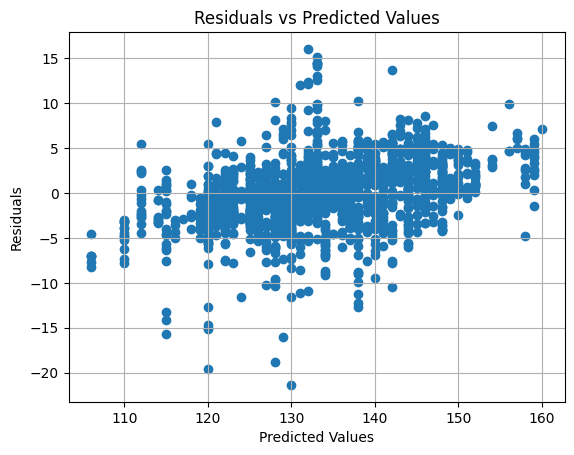

In [32]:
plt.scatter(y_train,residuals_lin)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

## **Lasso Regression**

In [33]:
model = Lasso()

# Define hyperparameters to tune
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train_scaled, y_train)

gs_results = pd.DataFrame(grid_search.cv_results_)
print(gs_results[['param_alpha', 'mean_test_score']])

# Print the best hyperparameters
print("Best alpha:", grid_search.best_params_)


  param_alpha  mean_test_score
0       0.001       -14.546370
1        0.01       -14.530660
2         0.1       -14.896449
3         1.0       -24.866293
4        10.0       -97.754984
Best alpha: {'alpha': 0.01}


In [34]:
# Access the best model
best_lasso = grid_search.best_estimator_


# Fit the best model on the entire dataset
best_lasso.fit(x_train_scaled, y_train)
best_lasso.coef_

array([-2.68096197, -0.05412188, -0.13081604,  2.39495814,  0.84779425,
        3.33833531,  1.20315071,  0.92353646,  0.26435949,  0.        ,
       -0.        ,  0.45629452,  0.75024702, -0.64330396,  0.12314748,
       -1.13709706,  4.6109261 ,  7.25267301, -0.51768891,  0.17488635])

In [35]:
y_pred_train_lasso=best_lasso.predict(x_train_scaled)
y_pred_test_lasso=best_lasso.predict(x_test_scaled)

print("mean squared error = {} \nr-squared score = {}".format(mean_squared_error(y_test,y_pred_test_lasso),r2_score(y_test,y_pred_test_lasso)))

mean squared error = 16.730477892754834 
r-squared score = 0.8209869492099144


In [36]:
n_parameters=len(lr.coef_)  # Number of coefficients + intercept

mse=mean_squared_error(y_train,best_lasso.predict(x_train_scaled))
# Calculate the log-likelihood
log_likelihood = -0.5 * mse * len(y_train)


# Calculate AIC and BIC
AIC = 2 * n_parameters - 2 * log_likelihood
BIC = np.log(len(y)) * n_parameters - 2 * log_likelihood
print("AIC:", AIC)
print("BIC:", BIC)

AIC: 23763.822494048916
BIC: 23877.062445226955


## **Residual Analysis in Lasso Regression**

### 1. Residual distribution

mean of residuals is  1.9677854117403246e-14 
 standard deviation of residuals is  3.7356645596709717


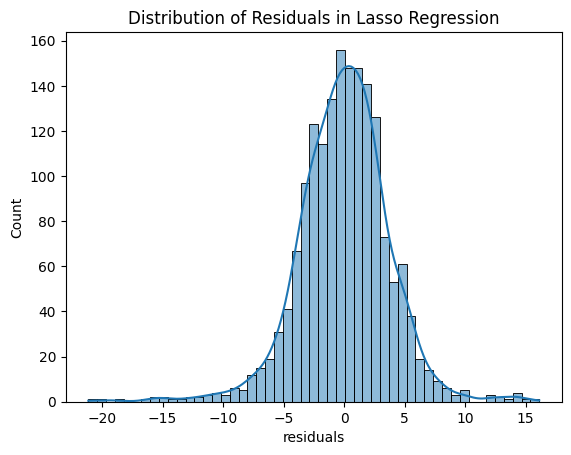

In [37]:
residuals_lasso=y_train-y_pred_train_lasso
print('mean of residuals is ',np.mean(residuals_lasso),'\n standard deviation of residuals is ',np.std(residuals_lasso))
sns.histplot(data=residuals_lasso,kde=True)
plt.xlabel('residuals')
plt.title('Distribution of Residuals in Lasso Regression')
plt.show()

### 3. Output vs Residuals

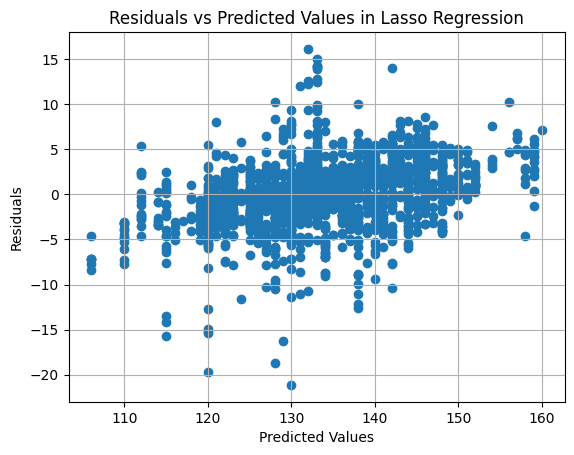

In [38]:
plt.scatter(y_train,residuals_lasso)
plt.title('Residuals vs Predicted Values in Lasso Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

## **Ridge regression**

In [39]:
model = Ridge()

# Define hyperparameters to tune
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train_scaled, y_train)

gs_results = pd.DataFrame(grid_search.cv_results_)
print(gs_results[['param_alpha', 'mean_test_score']])

# Print the best hyperparameters
print("Best alpha:", grid_search.best_params_)


  param_alpha  mean_test_score
0       0.001       -14.548788
1        0.01       -14.548742
2         0.1       -14.548287
3         1.0       -14.544319
4        10.0       -14.549302
Best alpha: {'alpha': 1.0}


In [40]:
# Access the best model
best_ridge = grid_search.best_estimator_


# Fit the best model on the entire dataset
best_ridge.fit(x_train_scaled, y_train)
best_ridge.coef_

array([-2.66814088, -0.06410124, -0.14218389,  2.44527363,  0.85625084,
        3.37970668,  1.2131818 ,  0.96145682,  0.27971245,  0.02245408,
       -0.01293479,  0.50352203,  0.80136507, -0.66181652,  0.13002551,
       -1.2498625 ,  4.69104352,  7.25560031, -0.56543639,  0.23025489])

In [41]:
y_pred_train_ridge=best_ridge.predict(x_train_scaled)
y_pred_test_ridge=best_ridge.predict(x_test_scaled)

print("mean squared error = {} \nr-squared score = {}".format(mean_squared_error(y_test,y_pred_test_ridge),r2_score(y_test,y_pred_test_ridge)))

mean squared error = 16.778600036374637 
r-squared score = 0.8204720510823678


In [42]:
n_parameters=len(lr.coef_)  # Number of coefficients + intercept

mse=mean_squared_error(y_train,best_ridge.predict(x_train_scaled))
# Calculate the log-likelihood
log_likelihood = -0.5 * mse * len(y_train)


# Calculate AIC and BIC
AIC = 2 * n_parameters - 2 * log_likelihood
BIC = np.log(len(y)) * n_parameters - 2 * log_likelihood
print("AIC:", AIC)
print("BIC:", BIC)

AIC: 23752.527218833537
BIC: 23865.767170011575


## **Residual Analysis in Ridge Regression**

### 1. Residual distribution

mean of residuals is  1.9485589612432864e-14 
 standard deviation of residuals is  3.7347751502390687


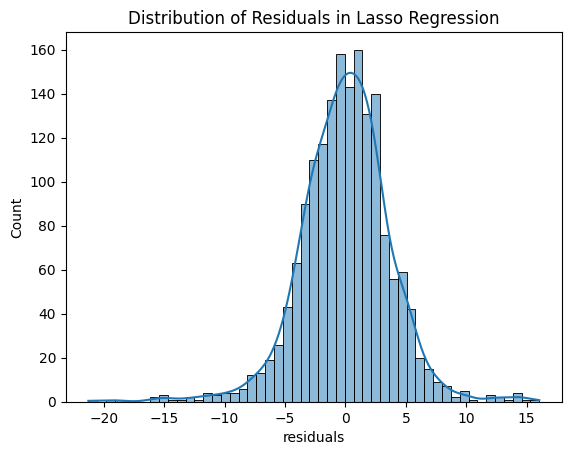

In [43]:
residuals_ridge=y_train-y_pred_train_ridge
print('mean of residuals is ',np.mean(residuals_ridge),'\n standard deviation of residuals is ',np.std(residuals_ridge))
sns.histplot(data=residuals_ridge,kde=True)
plt.xlabel('residuals')
plt.title('Distribution of Residuals in Lasso Regression')
plt.show()

### 3. Output vs Residuals

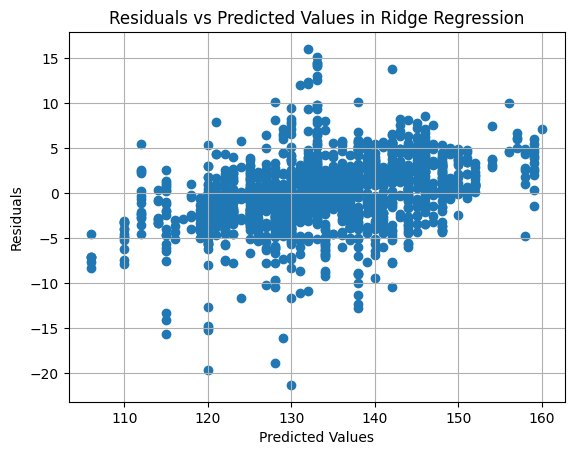

In [44]:
plt.scatter(y_train,residuals_ridge)
plt.title('Residuals vs Predicted Values in Ridge Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

## **Polynomial regression**

In [46]:
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly=poly.transform(x_test_scaled)
poly_lin = LinearRegression()
poly_lin.fit(x_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred_train_poly=poly_lin.predict(x_train_scaled)
y_pred_test_poly=poly_lin.predict(x_test_scaled)

## **Model comparison and Results**

In [45]:
r2_scores=[]
mse_scores=[]

models=['Linear regression', 'Lasso Regression', 'Ridge Regression']
mse_scores.append(mean_squared_error(y_test,y_pred_test_lin))
r2_scores.append(r2_score(y_test,y_pred_test_lin))

mse_scores.append(mean_squared_error(y_test,y_pred_test_lasso))
r2_scores.append(r2_score(y_test,y_pred_test_lasso))

mse_scores.append(mean_squared_error(y_test,y_pred_test_ridge))
r2_scores.append(r2_score(y_test,y_pred_test_ridge))

model_results=pd.DataFrame({'models': models,'mse':mse_scores,'r2 score':r2_scores})
model_results

,models,mse,r2 score
0,Linear regression,16.780218,0.820455
1,Lasso Regression,16.730478,0.820987
2,Ridge Regression,16.778600,0.820472
